In [1]:
# import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

In [2]:
import warnings 
warnings.filterwarnings('ignore')


In [3]:
#load the datasets
iris=datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
#convert the skleran dataset into dataframe
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

#appending labels to the  dataframe
df['target']=iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
#dataset descriptions
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
#from IPython.display import Image
#Image(url="IRIS_flower.png",width=700,hight=600)

In [7]:
#sneak peek data 
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
#return the n rows
#initiallly it give last 4 rows of data
df.tail() #here we can assign value and get that number of rows from bottom

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [9]:
#number of rows and column in datasets we use shape class
df.shape

(150, 5)

In [10]:
#generate information anout dataset
df.info

<bound method DataFrame.info of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8

In [11]:
#handling missing values

#check the null value and return sum of it 
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [12]:
#check randomness of dataframe
print("before sorting ")
df

before sorting 


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [13]:
#sort on sepal width
df.sort_values("sepal width (cm)",axis=0,inplace=True,na_position='last')

In [14]:
#dtatframe after sort
print("After sorting")
df

After sorting


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
60,5.0,2.0,3.5,1.0,1
62,6.0,2.2,4.0,1.0,1
119,6.0,2.2,5.0,1.5,2
68,6.2,2.2,4.5,1.5,1
41,4.5,2.3,1.3,0.3,0
...,...,...,...,...,...
16,5.4,3.9,1.3,0.4,0
14,5.8,4.0,1.2,0.2,0
32,5.2,4.1,1.5,0.1,0
33,5.5,4.2,1.4,0.2,0


<AxesSubplot:xlabel='target', ylabel='count'>

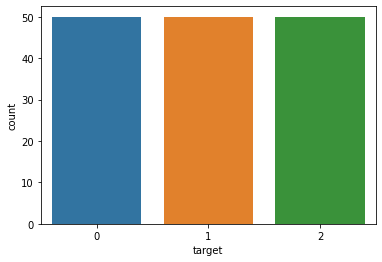

In [15]:
#exploring data anlysis
sns.countplot(df['target'])

#here all the classes in target feature having equal number of count
#thats why it is advisable to choose this dataset


<AxesSubplot:xlabel='petal length (cm)'>

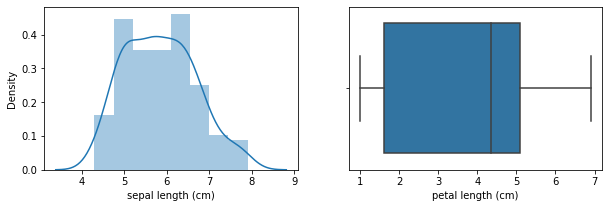

In [16]:
#univeriate analysis on sepal length
f=plt.figure(figsize=(10,3))
f=plt.subplot(1,2,1)
sns.distplot(df['sepal length (cm)'])
f=plt.subplot(1,2,2)
sns.boxplot(df['petal length (cm)'])

<AxesSubplot:xlabel='petal width (cm)'>

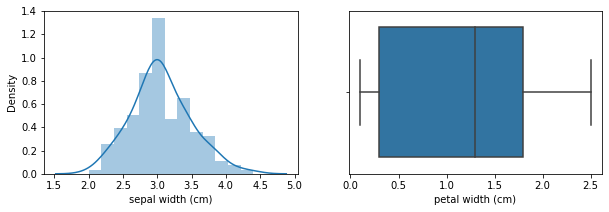

In [17]:
#univeriate analysis on petal width
f=plt.figure(figsize=(10,3))
f=plt.subplot(1,2,1)
sns.distplot(df['sepal width (cm)'])
f=plt.subplot(1,2,2)
sns.boxplot(df['petal width (cm)'])

In [18]:
#sepal length , petal length, petal width doesnt have outliers

#here sepal width have outliers

In [19]:
#kNN devolopements
#create kNN object
knn=KNeighborsClassifier()
help(knn)

Help on KNeighborsClassifier in module sklearn.neighbors._classification object:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'} or callable, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighbors o

In [20]:
#craete x and y variables 
x=df.drop(columns=['target'])
y=df['target']

In [21]:
#transform the dataset
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [22]:
#split data into training and testing dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)


In [23]:
#traing the model
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [24]:
#check mode performaance
knn.score(x_test,y_test)

0.9333333333333333

In [25]:
#model Evalution
#total number of instances
y_test.value_counts()

2    19
1    15
0    11
Name: target, dtype: int64

In [26]:
from sklearn.metrics import confusion_matrix
y_pred=knn.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[11,  0,  0],
       [ 0, 15,  0],
       [ 0,  3, 16]])

Text(0, 0.5, 'actual lable')

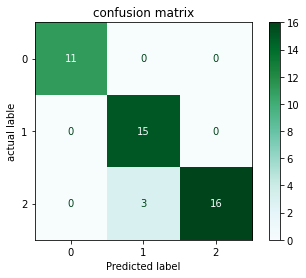

In [27]:
from sklearn.metrics import plot_confusion_matrix
cmd=plot_confusion_matrix(knn,x_test,y_test,display_labels=['0','1','2'],cmap=plt.cm.BuGn,normalize=None)
plt.title("confusion matrix")
plt.ylabel("actual lable")


Text(0, 0.5, 'actual lable')

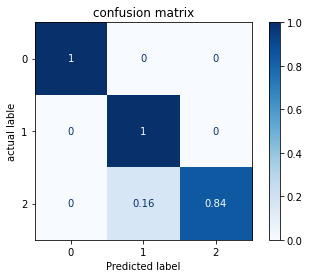

In [28]:
from sklearn.metrics import plot_confusion_matrix
cmd=plot_confusion_matrix(knn,x_test,y_test,display_labels=['0','1','2'],cmap=plt.cm.Blues,normalize="true")
plt.title("confusion matrix")
plt.ylabel("actual lable")